#**GRIP @The Sparks Foundation**
##**Role : Data Science And Business Analytics Internship**
##**Author : Aditya Nair**
##**Task-2 : Prediction Using Unsupervised Learning Algorithm**

###***Task-Strategy: In this particular task we have been given three species namely Iris setosa, Iris virginica and Iris versicolor which we need to cluster it into their respective species clusters/categories which can be done very easily using Simple K-Means clustering based on their features provided namely  length and width of sepals and petals***

###***Technical-Stack Used -> Pandas , Numpy , Scikit , Matplotlib***

####**Step-1->Import the necessary Libraries Required**

In [2]:
from sklearn import datasets
import sklearn.metrics as metric
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

####**Step-2->Load the Iris dataset from sklearn and create a pandas dataframe**

In [3]:
iris_data = datasets.load_iris()#load the dataset
df_for_iris = pd.DataFrame(data = iris_data.data , columns = iris_data.feature_names)#create a dataframe
df_for_iris.head(10)#explore the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


####**Step-3->Determine the best value for K using the WCSS and ELBOW method and visualize it by plotting**

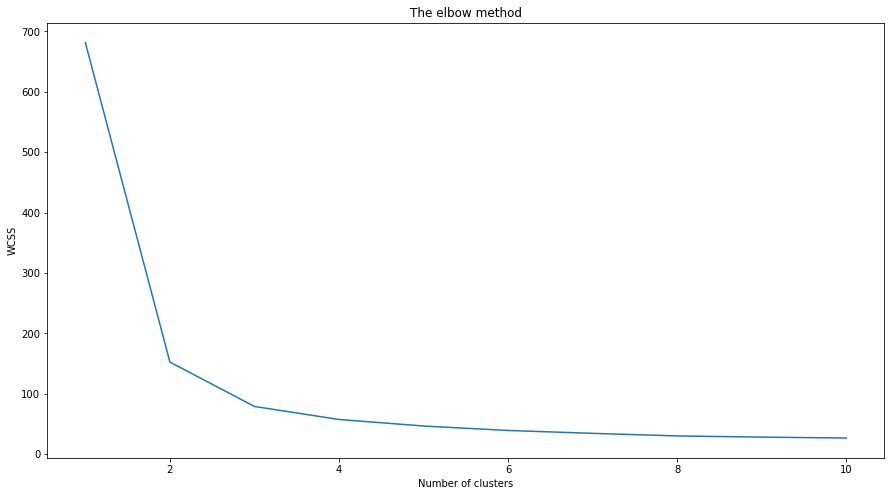

In [4]:
x = df_for_iris.iloc[: , 0 : 4].values
wcss = []#within cluster sum of squares.
for i in range(1 , 11):#this loop gives us the ideal value fot our K in the K means algorithm
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)#will gives us the summation of squared distances of sample to their closest cluster center 
plt.figure(figsize= (15 , 8))
plt.plot(range(1 , 11) , wcss )
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

####**Step-4->Now try to predict the centroids of the clusters by creating Kmeans model**

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)#create the kmeans using the k that we have
y_kmeans = kmeans.fit_predict(x)


####**Step-5->Visualize the centorids**


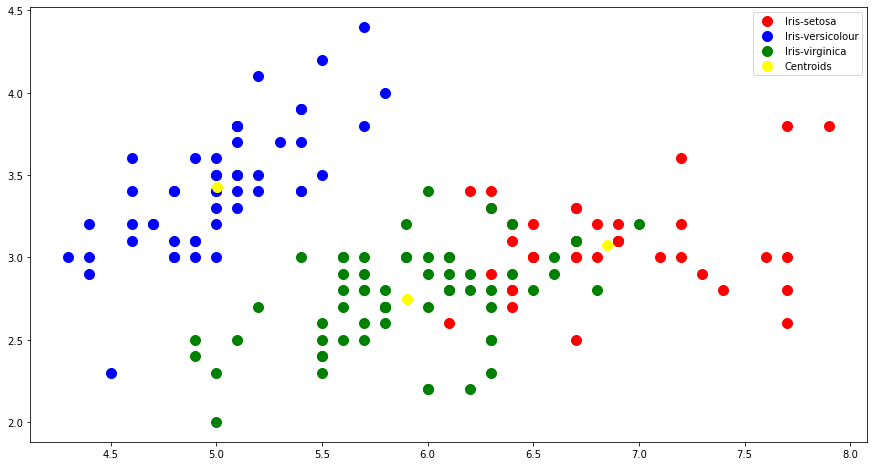

In [6]:
plt.figure(figsize=(15 , 8))
plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans == 0 , 1] , s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans == 1 , 1] , s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans == 2 , 1] , s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

####**Step-6->Visualize the input features**

In [7]:
x = iris_data.data#the input feature
y = iris_data.target#the target category that we need to categorize/cluster into based on the input feature
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 0.92, 'K-means Clustering for the given properties of flowers')

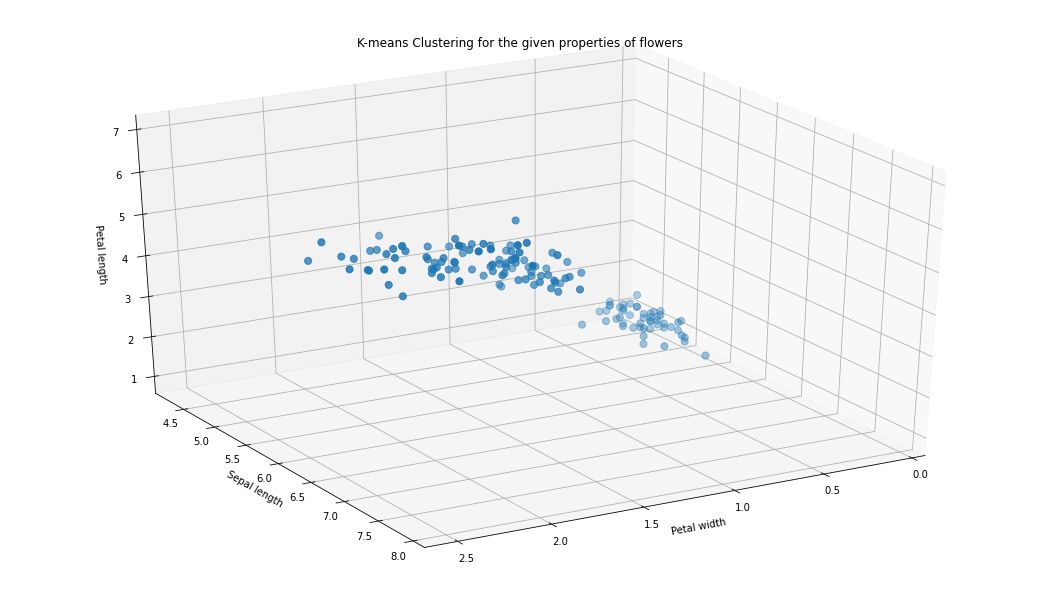

In [8]:
fig = plt.figure(1,figsize=(15 , 8))
threedeefig = Axes3D(fig , rect = [0 , 0 , 0.95 , 1] , elev = 30 , azim = 60)
threedeefig.scatter(x[: , 3] , x[: , 0] , x[: , 2] , s = 50 )
threedeefig.set_xlabel("Petal width")
threedeefig.set_ylabel("Sepal length")
threedeefig.set_zlabel("Petal length")
plt.title("K-means Clustering for the given properties of flowers" )

####**Step-7->Data Preprocessing**








In [9]:
listofinputcolumns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']#create input features labels 
x = pd.DataFrame(data = iris_data.data , columns = listofinputcolumns)#create a dataframe for input features
x.head(15)


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
classificationcolumn = ['Species']#create the classification labels
y = pd.DataFrame(data = iris_data.target , columns=classificationcolumn)#and also a dataframe
y.head(15)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


####**Step-8->Train the model**

In [11]:
iris_model = KMeans(n_clusters=3)#kmeans using the K value that we have derived from the elbow method above
iris_model.fit(x)

KMeans(n_clusters=3)

In [ ]:
iris_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

####**Step-9->Visualize the clusters formed by model**

Text(0.5, 1.0, 'Classification 2 After Predicted')

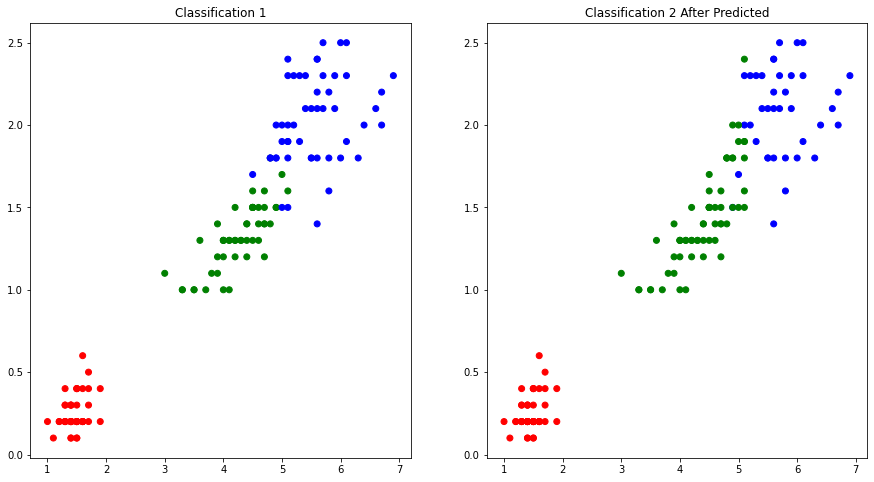

In [12]:
plt.figure(figsize=(15 , 8))
color_list = np.array(['red' , 'green' , 'blue'])
predict_iris_flowers = np.choose(iris_model.labels_ , [1 , 0 , 2])
plt.subplot(1,2,1)
plt.scatter(x['Petal Length'] , x['Petal Width'] , c = color_list[y['Species']])
plt.title("Classification 1")
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'] , x['Petal Width'] , c = color_list[predict_iris_flowers])
plt.title("Classification 2 After Predicted")

####**Step-10->Evaluate and calculate the accuracy score of the model**
**We calculate the score using the accuracy_score() function.The ideal/best score is 1**.
**We also use the confusion matrix as well for our True negatives , false negatives , true positives and false positives.
The class labels(0 , 1 , 2) used for classification are the columns in the matrix. Every entry in the matrix gives us the idea of count , that how many true class were predicted.**

In [13]:
metric.accuracy_score(y , predict_iris_flowers)#gives us the accuracy score of the model which is used to evaluate the model.

0.8933333333333333

In [14]:
metric.confusion_matrix(y , predict_iris_flowers)#use the confusion matrix for evaluating the count of how many true classes we have for the classes labels

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

#**Conclusion : We have been successfully able to classify the dataset presented to us by using the K-means algorithm**